In [1]:
#202101491 신서연

In [2]:
#Lab 8

#기본설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter

#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_add(v, w):
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [3]:
#경사하강법의 숨은 의미
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

vector = [i for i in range(10)]
sum_of_squares(vector)

np.sum(np.square(vector))

#그래디언트 계산하기
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

285

285

Text(0.5, 1.0, 'actual Derivatives vs. Estimates')

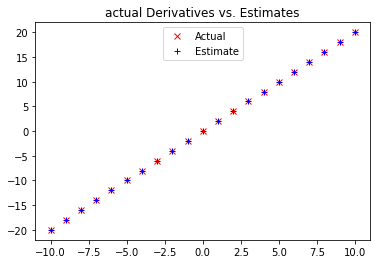

In [6]:
#단변수 함수 미분값 계산
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

#단변수 함수 근사법으로 미분값 계산
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

# 두 계산식의 결괏값이 거의 비슷함을 보여 주기 위한 그래프
# plot to show they're basically the same
import matplotlib.pyplot as plt    
plt.title("actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') 
plt.plot(xs, estimates, 'b+', label='Estimate')  
plt.legend(loc=9)
plt.show()              

In [7]:
#다변수 함수 미분값 계산
#편도함수를 수학식으로 구할 수 있는 경우
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h
#편도함수를 수학식으로 구할 수 없는 경우
def estimate_gradient(f, v, h=0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

#다변수 함수 근사법으로 미분값 계산
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [8]:
#그래드언트 적용하기
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# 임의의 시작점을 선택
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001   # 아주 작은 e값

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)	# compute the gradient at v
    next_v = step(v, gradient, -0.0001)     	# take a negative gradient step
    if distance(next_v, v) < tolerance:     	# stop if we're converging
        break
    v = next_v                              		# continue if we're not
    #print(v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))

minimum v [-0.0004055347087332075, 0.00016221388349328079, 0.0002433208252399259]
minimum value 2.4997676798073767e-07


In [9]:
#202101491 신서연